<a href="https://colab.research.google.com/github/Kevinsamuelgitau/Gitau/blob/master/Samuel_Gitau_W6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LOADING THE DATASETS

In [2]:
#To load our first dataset
df = pd.read_csv('fifa_ranking.csv')
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
# To load our second dataset
df2 = pd.read_csv('results.csv')
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
# We will need to merge the two datasets for use in analysis
# Renaming country column before merging
df.rename(columns = {'country_full': 'country'}, inplace = True)

In [5]:
# Merging the two datasets
combined= pd.merge(df, df2, left_on='country', right_on='country')
combined

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False
3,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246505,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-09-06,Gibraltar,North Macedonia,0,2,UEFA Nations League,Gibraltar,False
10246506,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-10-16,Gibraltar,Liechtenstein,2,1,UEFA Nations League,Gibraltar,False
10246507,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-11-16,Gibraltar,Armenia,2,6,UEFA Nations League,Gibraltar,False
10246508,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2019-03-23,Gibraltar,Republic of Ireland,0,1,UEFA Euro qualification,Gibraltar,False


# DATA CLEANING

In [0]:
# dropping records we don't require in analysis
#since ranking stated in 1992, we will drop all matches played before '1993-08-08'
combined = combined[combined['date'] >= '1993-01-01']


In [7]:
# Check for missing Data
#
combined.isnull().sum()
# The dataset has no missing values

rank                       0
country                    0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
dtype: int64

In [8]:
# Checking if there are duplicates
combined.duplicated()
# There are no duplicates in the dataset

304         False
305         False
306         False
307         False
308         False
            ...  
10246505    False
10246506    False
10246507    False
10246508    False
10246509    False
Length: 5918245, dtype: bool

In [9]:
#To remove white spaces in our columns
combined.columns.str.replace(" "," ")

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'neutral'],
      dtype='object')

In [10]:
# To check dataset properties
combined.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06,5.918245e+06
mean,7.523155e+01,1.587801e+02,4.303393e+02,-1.325731e-02,7.999821e+01,7.999821e+01,7.930312e+01,3.965162e+01,7.833977e+01,2.350196e+01,7.813050e+01,1.562613e+01,1.642082e+00,1.090115e+00
std,5.122277e+01,3.124796e+02,3.347812e+02,5.509275e+00,1.640509e+02,1.640509e+02,1.642183e+02,8.210920e+01,1.620558e+02,4.861675e+01,1.619114e+02,3.238229e+01,1.684058e+00,1.328393e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e+01,0.000000e+00,1.340000e+02,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+01,0.000000e+00,4.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,1.120000e+02,1.876300e+02,6.200000e+02,1.000000e+00,7.885000e+01,7.885000e+01,7.786000e+01,3.893000e+01,7.323000e+01,2.197000e+01,7.212000e+01,1.442000e+01,2.000000e+00,2.000000e+00
max,2.090000e+02,1.775030e+03,1.920000e+03,9.200000e+01,1.158660e+03,1.158660e+03,1.169570e+03,5.847900e+02,1.159710e+03,3.479100e+02,1.200770e+03,2.401500e+02,3.100000e+01,2.100000e+01


In [11]:
# To check datatypes
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5918245 entries, 304 to 10246509
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   rank                     int64  
 1   country                  object 
 2   country_abrv             object 
 3   total_points             float64
 4   previous_points          int64  
 5   rank_change              int64  
 6   cur_year_avg             float64
 7   cur_year_avg_weighted    float64
 8   last_year_avg            float64
 9   last_year_avg_weighted   float64
 10  two_year_ago_avg         float64
 11  two_year_ago_weighted    float64
 12  three_year_ago_avg       float64
 13  three_year_ago_weighted  float64
 14  confederation            object 
 15  rank_date                object 
 16  date                     object 
 17  home_team                object 
 18  away_team                object 
 19  home_score               int64  
 20  away_score               int64  
 21  tourn

In [12]:
# To change rank_date from object to datetime
pd.to_datetime(combined['rank_date'])

304        1993-08-08
305        1993-08-08
306        1993-08-08
307        1993-08-08
308        1993-08-08
              ...    
10246505   2018-06-07
10246506   2018-06-07
10246507   2018-06-07
10246508   2018-06-07
10246509   2018-06-07
Name: rank_date, Length: 5918245, dtype: datetime64[ns]

In [13]:
# To change rank_date from object to datetime
pd.to_datetime(combined['date'])

304        1993-04-14
305        1993-10-13
306        1993-11-17
307        1994-03-23
308        1994-05-29
              ...    
10246505   2018-09-06
10246506   2018-10-16
10246507   2018-11-16
10246508   2019-03-23
10246509   2019-03-26
Name: date, Length: 5918245, dtype: datetime64[ns]

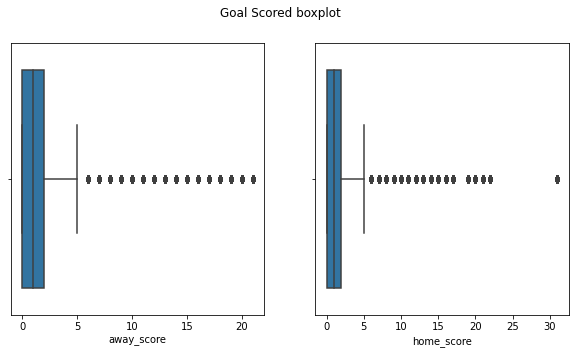

In [14]:
# Checking for Outliers
#We will check and remove outliers in our most important columns in analysis


fig, (ax1,ax2) = plt.subplots(1,2, figsize =  (10,5))
plt.suptitle('Goal Scored boxplot')

sns.boxplot(combined['away_score'], ax= ax1)
sns.boxplot(combined['home_score'], ax= ax2)

In [0]:
#remove the outliers
#from the Boxplots we can see that most goals scored range from 0 - 5,
#Hence we will drop values greater than 5

new_df= combined[combined['home_score'] <= 5]
new_df = combined[combined['away_score'] <= 5]

In [16]:
new_df

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
304,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-04-14,Germany,Ghana,6,1,Friendly,Bochum,False
305,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-10-13,Germany,Uruguay,5,0,Friendly,Karlsruhe,False
306,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-11-17,Germany,Brazil,2,1,Friendly,Cologne,False
307,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1994-03-23,Germany,Italy,2,1,Friendly,Stuttgart,False
308,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1994-05-29,Germany,Republic of Ireland,0,2,Friendly,Hanover,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246504,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-03-25,Gibraltar,Latvia,1,0,Friendly,Gibraltar,False
10246505,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-09-06,Gibraltar,North Macedonia,0,2,UEFA Nations League,Gibraltar,False
10246506,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-10-16,Gibraltar,Liechtenstein,2,1,UEFA Nations League,Gibraltar,False
10246508,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2019-03-23,Gibraltar,Republic of Ireland,0,1,UEFA Euro qualification,Gibraltar,False


In [17]:
# we will need to create an away team ranking column
# we create the result column
# 
# we first create a dummy column to hold our substraction on home and away score 
new_df['column'] = new_df['home_score'] - new_df['away_score']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
new_df

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral,column
304,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-04-14,Germany,Ghana,6,1,Friendly,Bochum,False,5
305,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-10-13,Germany,Uruguay,5,0,Friendly,Karlsruhe,False,5
306,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-11-17,Germany,Brazil,2,1,Friendly,Cologne,False,1
307,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1994-03-23,Germany,Italy,2,1,Friendly,Stuttgart,False,1
308,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1994-05-29,Germany,Republic of Ireland,0,2,Friendly,Hanover,False,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246504,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-03-25,Gibraltar,Latvia,1,0,Friendly,Gibraltar,False,1
10246505,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-09-06,Gibraltar,North Macedonia,0,2,UEFA Nations League,Gibraltar,False,-2
10246506,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-10-16,Gibraltar,Liechtenstein,2,1,UEFA Nations League,Gibraltar,False,1
10246508,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2019-03-23,Gibraltar,Republic of Ireland,0,1,UEFA Euro qualification,Gibraltar,False,-1


In [19]:
# we use a conditional statement to assign names to the results obtained above
# we drop our dummy column
new_df.loc[new_df['column'] > 0, 'result'] = 'win'  
new_df.loc[new_df['column'] == 0, 'result'] = 'draw'  
new_df.loc[new_df['column'] < 0, 'result'] = 'loss'  
new_df = new_df.drop('column', axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
new_df

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral,result
304,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-04-14,Germany,Ghana,6,1,Friendly,Bochum,False,win
305,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-10-13,Germany,Uruguay,5,0,Friendly,Karlsruhe,False,win
306,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-11-17,Germany,Brazil,2,1,Friendly,Cologne,False,win
307,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1994-03-23,Germany,Italy,2,1,Friendly,Stuttgart,False,win
308,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1994-05-29,Germany,Republic of Ireland,0,2,Friendly,Hanover,False,loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246504,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-03-25,Gibraltar,Latvia,1,0,Friendly,Gibraltar,False,win
10246505,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-09-06,Gibraltar,North Macedonia,0,2,UEFA Nations League,Gibraltar,False,loss
10246506,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-10-16,Gibraltar,Liechtenstein,2,1,UEFA Nations League,Gibraltar,False,win
10246508,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2019-03-23,Gibraltar,Republic of Ireland,0,1,UEFA Euro qualification,Gibraltar,False,loss


In [0]:
# rename rank column
new_df.rename(columns = {'rank':'hometeam_rank'}, inplace=True)

In [0]:
# we will drop more columns that we aren't going to use for analysis
# 
#  home_team is the same as country

df = new_df.drop(['country', 'country_abrv', 'total_points',  'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',	'last_year_avg_weighted',  'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'rank_date', 'city'],axis=1)

In [0]:
# arrange the columns
df= df[[ 'home_team', 'home_score', 'away_team', 'away_score', 'result', 'date',  'tournament', 'hometeam_rank', 'neutral', 'previous_points', 'rank_change', 'confederation']]

In [24]:
# check the dataframe
df

,home_team,home_score,away_team,away_score,result,date,tournament,hometeam_rank,neutral,previous_points,rank_change,confederation
304,Germany,6,Ghana,1,win,1993-04-14,Friendly,1,False,57,0,UEFA
305,Germany,5,Uruguay,0,win,1993-10-13,Friendly,1,False,57,0,UEFA
306,Germany,2,Brazil,1,win,1993-11-17,Friendly,1,False,57,0,UEFA
307,Germany,2,Italy,1,win,1994-03-23,Friendly,1,False,57,0,UEFA
308,Germany,0,Republic of Ireland,2,loss,1994-05-29,Friendly,1,False,57,0,UEFA
...,...,...,...,...,...,...,...,...,...,...,...,...
10246504,Gibraltar,1,Latvia,0,win,2018-03-25,Friendly,195,False,34,1,UEFA
10246505,Gibraltar,0,North Macedonia,2,loss,2018-09-06,UEFA Nations League,195,False,34,1,UEFA
10246506,Gibraltar,2,Liechtenstein,1,win,2018-10-16,UEFA Nations League,195,False,34,1,UEFA
10246508,Gibraltar,0,Republic of Ireland,1,loss,2019-03-23,UEFA Euro qualification,195,False,34,1,UEFA


In [25]:
df1= df.copy()
df1

,home_team,home_score,away_team,away_score,result,date,tournament,hometeam_rank,neutral,previous_points,rank_change,confederation
304,Germany,6,Ghana,1,win,1993-04-14,Friendly,1,False,57,0,UEFA
305,Germany,5,Uruguay,0,win,1993-10-13,Friendly,1,False,57,0,UEFA
306,Germany,2,Brazil,1,win,1993-11-17,Friendly,1,False,57,0,UEFA
307,Germany,2,Italy,1,win,1994-03-23,Friendly,1,False,57,0,UEFA
308,Germany,0,Republic of Ireland,2,loss,1994-05-29,Friendly,1,False,57,0,UEFA
...,...,...,...,...,...,...,...,...,...,...,...,...
10246504,Gibraltar,1,Latvia,0,win,2018-03-25,Friendly,195,False,34,1,UEFA
10246505,Gibraltar,0,North Macedonia,2,loss,2018-09-06,UEFA Nations League,195,False,34,1,UEFA
10246506,Gibraltar,2,Liechtenstein,1,win,2018-10-16,UEFA Nations League,195,False,34,1,UEFA
10246508,Gibraltar,0,Republic of Ireland,1,loss,2019-03-23,UEFA Euro qualification,195,False,34,1,UEFA


# EDA

UNIVARATE ANALYSIS

win     2875316
loss    1564825
draw    1412668
Name: result, dtype: int64

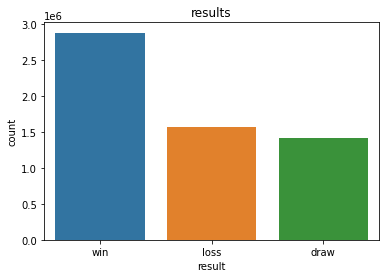

In [0]:
# We will create visual displays of the dataset
sns.countplot(df['result'])
plt.title('results')

df['result'].value_counts()
# Most home teams won

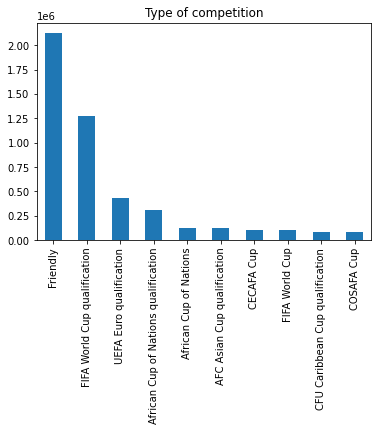

In [0]:
plt.title('Type of competition')

df['tournament'].value_counts().sort_values(ascending = False).head(10).plot.bar()

# most matches played are frendlies 

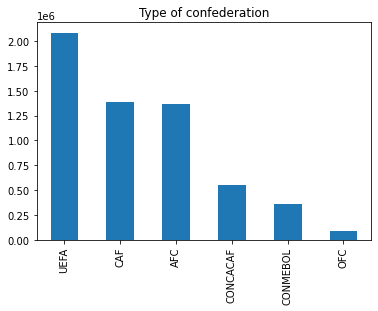

In [0]:
plt.title('Type of confederation')

df['confederation'].value_counts().sort_values(ascending = False).head(10).plot.bar()
# Most games were played under UEFA

False    4378997
True     1473812
Name: neutral, dtype: int64

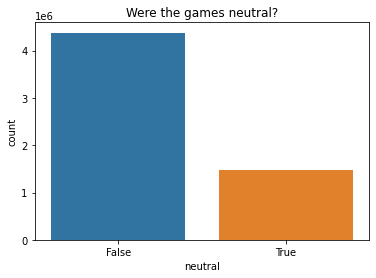

In [0]:
sns.countplot(df['neutral'])
plt.title('Were the games neutral?')

df['neutral'].value_counts()

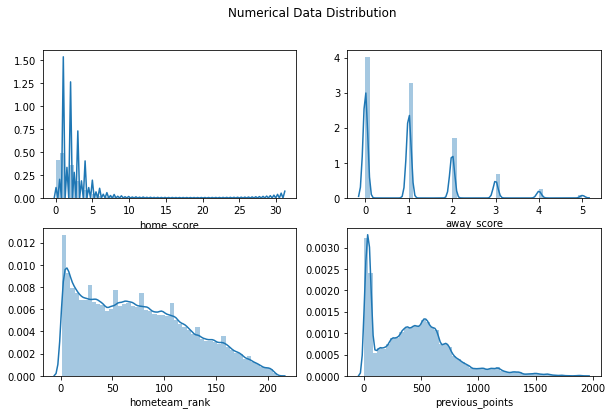

In [0]:
# Now let's check distribution of our numerical data
df.columns
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize = (10,6))
plt.suptitle('Numerical Data Distribution')
sns.distplot(df['home_score'], ax = ax1)
sns.distplot(df['away_score'], ax = ax2)
sns.distplot(df['hometeam_rank'], ax = ax3)
sns.distplot(df['previous_points'], ax = ax4)

Bivarite analysis

In [0]:
# We will check for relationship of wins and hometeams

win = df[df['result'] == 'win']
win = pd.DataFrame(win.groupby(['home_team'])['result'].value_counts().sort_values(ascending = False))
win.reset_index(level = 0, inplace = True)

#And obtain the numerical variables
df.columns
num = df[['home_score','away_score','hometeam_rank', 'previous_points', 'rank_change']]

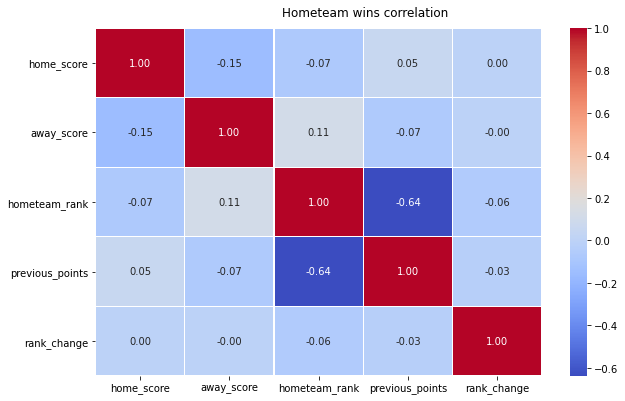

In [0]:
#Visualizing the correlation
f , ax = plt.subplots(figsize = (10,6))
corr = num.corr()
cor = sns.heatmap(corr, annot = True, ax =ax , cmap = "coolwarm", fmt = '.2f',linewidths= .05)
f.subplots_adjust(top =0.93)
t = f.suptitle('Hometeam wins correlation')
# there is a strong correlation of hometeam_rank and Previous_points

# IMPLEMENTING THE SOLUTION

We will use polynomial and logistic regression for modelling

Multicollinearity check

In [0]:
# We need to convert our categorical variable into numerical
# We will  use the Label Encoder library

encore = df1.copy()

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

encore['home_team']=LE.fit_transform(encore['home_team'])
encore['away_team']=LE.fit_transform(encore['away_team'])
encore['result']=LE.fit_transform(encore['result'])
encore['tournament']=LE.fit_transform(encore['tournament'])
encore['neutral']=LE.fit_transform(encore['neutral'])
encore['confederation']=LE.fit_transform(encore['confederation'])
encore.head()

,home_team,home_score,away_team,away_score,result,date,tournament,hometeam_rank,neutral,previous_points,rank_change,confederation
304,99,6,97,1,2,1993-04-14,32,1,0,57,0,5
305,99,5,271,0,2,1993-10-13,32,1,0,57,0,5
306,99,2,35,1,2,1993-11-17,32,1,0,57,0,5
307,99,2,125,1,2,1994-03-23,32,1,0,57,0,5
308,99,0,204,2,1,1994-05-29,32,1,0,57,0,5


In [0]:
encore = encore.drop('date', axis=1)

In [0]:
#to check for correlation between fields
cor = encore.corr()
cor

,home_team,home_score,away_team,away_score,result,tournament,hometeam_rank,neutral,previous_points,rank_change,confederation
home_team,1.000000,0.009428,0.004620,-0.018585,0.001750,-0.045061,0.006541,-0.013650,-0.035238,-0.001451,-0.107012
home_score,0.009428,1.000000,-0.035055,-0.151880,0.515278,-0.008857,-0.070322,-0.020545,0.054448,0.000100,-0.008492
away_team,0.004620,-0.035055,1.000000,0.012410,-0.019566,-0.018301,0.022911,0.059368,-0.021085,-0.000779,-0.066016
away_score,-0.018585,-0.151880,0.012410,1.000000,-0.258022,0.023865,0.112338,0.076739,-0.067430,-0.000632,0.042844
result,0.001750,0.515278,-0.019566,-0.258022,1.000000,-0.000933,-0.069699,-0.038978,0.048884,-0.000105,0.001674
tournament,-0.045061,-0.008857,-0.018301,0.023865,-0.000933,1.000000,-0.153274,-0.120708,0.119767,0.002424,0.407212
hometeam_rank,0.006541,-0.070322,0.022911,0.112338,-0.069699,-0.153274,1.000000,-0.031763,-0.637746,-0.056699,-0.421013
neutral,-0.013650,-0.020545,0.059368,0.076739,-0.038978,-0.120708,-0.031763,1.000000,0.026252,-0.001303,-0.101299
previous_points,-0.035238,0.054448,-0.021085,-0.067430,0.048884,0.119767,-0.637746,0.026252,1.000000,-0.029054,0.342545
rank_change,-0.001451,0.000100,-0.000779,-0.000632,-0.000105,0.002424,-0.056699,-0.001303,-0.029054,1.000000,0.006032


In [0]:
#multicollieality check

pd.DataFrame(np.linalg.inv(cor.values), index = cor.index, columns=cor.columns)

# revious_points has the highest multicolinearity 
# Hence we will drop these column in order to imporve our model

encording = encore.drop('previous_points', axis = 1)
cor = encording.corr()
pd.DataFrame(np.linalg.inv(cor.values), index = cor.index, columns=cor.columns)

,home_team,home_score,away_team,away_score,result,tournament,hometeam_rank,neutral,rank_change,confederation
home_team,1.014362,-0.007554,0.000979,0.006389,0.008118,0.003370,0.049225,0.028653,0.003511,0.130496
home_score,-0.007554,1.366700,0.035063,0.018879,-0.694257,0.006005,0.061818,0.003867,0.003089,0.037419
away_team,0.000979,0.035063,1.008677,-0.006879,-0.001919,-0.015292,0.005677,-0.053219,0.000643,0.070512
away_score,0.006389,0.018879,-0.006879,1.100357,0.259545,-0.013061,-0.159191,-0.092054,-0.007677,-0.118170
result,0.008118,-0.694257,-0.001919,0.259545,1.426786,-0.002080,0.018595,0.021204,0.001528,-0.007848
tournament,0.003370,0.006005,-0.015292,-0.013061,-0.002080,1.208743,-0.015384,0.097899,-0.000742,-0.488805
hometeam_rank,0.049225,0.061818,0.005677,-0.159191,0.018595,-0.015384,1.264905,0.109934,0.068478,0.562486
neutral,0.028653,0.003867,-0.053219,-0.092054,0.021204,0.097899,0.109934,1.038495,0.006599,0.115072
rank_change,0.003511,0.003089,0.000643,-0.007677,0.001528,-0.000742,0.068478,0.006599,1.003746,0.024517
confederation,0.130496,0.037419,0.070512,-0.118170,-0.007848,-0.488805,0.562486,0.115072,0.024517,1.471383


# MODEL 1

We will predict how many goals the home teams score

In [0]:
# spliting our dataset into features(X) and Targets(y)

y = encording['home_score']

X = encording.drop(['home_score'], axis = 1)

In [0]:
#  spliting our dataframe into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [0]:
#standardize the data

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
# apply linear Regression model to our data

from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,  y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#checking coefficients of linear regration

coef = pd.DataFrame(regressor.coef_, X.columns, columns = ['coefficients'])

coef.sort_values(by = ['coefficients'], ascending = False)

,coefficients
result,0.856664
home_team,0.009179
rank_change,-0.003634
neutral,-0.004936
tournament,-0.007411
away_score,-0.023192
away_team,-0.043248
confederation,-0.046111
hometeam_rank,-0.075433


In [0]:
#making predictions using our model

y_pred = regressor.predict(X_test)

In [0]:
# Describing both our predicted and actual values

comparison_frame = pd.DataFrame({'Actual':y_test, 'predicted':y_pred})

comparison_frame['predicted'].describe()

count    1.170562e+06
mean     1.654522e+00
std      8.732869e-01
min      6.150313e-03
25%      1.156903e+00
50%      1.502562e+00
75%      2.465826e+00
max      2.686741e+00
Name: predicted, dtype: float64

In [0]:
# Calculating the accuracy of our model
from sklearn import metrics

print('Accuracy:', regressor.score(X_test, y_test))

Accuracy: 0.26818749176504364


In [0]:
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
# From the operations above, we can establish that our model isn't accurate so we will try to improve it

RMSE: 1.022709265762248


Cross validation

In [0]:
# we will use KFold method
from sklearn.model_selection import KFold

y = encording['home_score'].values

X = encording.drop(['home_score'], axis = 1).values

folds = KFold(n_splits=5)
 
# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  #standardize our data

  from sklearn.preprocessing import StandardScaler
  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)

  
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value) 
  count = count + 1


Training model 1
Model 1 Root Mean Squared Error: 1.5019729159042272

Training model 2
Model 2 Root Mean Squared Error: 1.3299545638890822

Training model 3
Model 3 Root Mean Squared Error: 1.5456463272869165

Training model 4
Model 4 Root Mean Squared Error: 1.327663818121941

Training model 5
Model 5 Root Mean Squared Error: 1.565435710568635


In [0]:

print(' Average Root Mean Squared Error:', np.mean(RMSES) )

# From the results, our RMSE has not greatly improved
# We will explore more options

 Average Root Mean Squared Error: 1.4541346671541604


 Residual ploting and heteroscedasticity

<function matplotlib.pyplot.show>

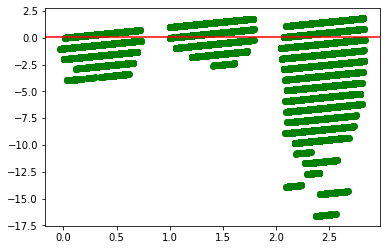

In [0]:
#we plot the residuals

residuals = np.subtract(y_pred, y_test)
pd.DataFrame(residuals).describe()

plt.scatter(y_pred, residuals, color = 'green')
plt.axhline(y = residuals.mean(), color = 'red')
plt.show


We can observe that our data follows a pattern, so it's not suitable to create a good model.

We will explore polynomial regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures
encode = df1[[ 'result','away_score','neutral','rank_change','confederation','home_score']]


X = encode.drop('home_score', axis = 1)
y = encode['home_score']

X = pd.get_dummies(X,drop_first=True).values
y =  pd.get_dummies(y,drop_first=True).values

# We will split our dataframe into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)




In [0]:
#standardize our data

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
#import polynomial model
from sklearn.preprocessing import PolynomialFeatures

# Fit polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X_train)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)


y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

## MODEL 2

We shall predict how many goals the away team scores using polynomial regression

In [0]:

#We will only include fields which have a positive correlation coefficieent


from sklearn.preprocessing import PolynomialFeatures
encord = df1[[ 'result','away_score','neutral','rank_change','confederation','home_score']]


X = encord.drop('away_score', axis = 1)
y = encord['away_score']

X = pd.get_dummies(X,drop_first=True).values
y =  pd.get_dummies(y,drop_first=True).values


In [0]:

# We will split our dataframe into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)


In [0]:
#standardize our data

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
#import polynomial model
from sklearn.preprocessing import PolynomialFeatures

In [0]:
# Fit polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X_train)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)


y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
#from the model created has a relatively high RMSES hence might not be very accurate in predicting away goals scored.

LOGISTIC REGRESSION

 From the home team’s perspective is the game a Win, Lose or Draw (W, L, D)?

In [26]:
#obtain only columns significant for our study


from sklearn.preprocessing import PolynomialFeatures
encord = df1[[ 'result','away_score','neutral','rank_change','confederation','home_score']]

# Get features and targets
X = logit.drop('result',axis =1)
y = logit['result']

# #Encode data using the get_dummies method
# X = pd.get_dummies(X,drop_first=True).values
# y =  pd.get_dummies(y,drop_first=True).values

# We will split our dataframe into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

NameError: ignored

In [0]:

#standardize our data

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [0]:
# Creating the logistic regression model

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()


# Creating regularization penalty space
penalty = ['l1', 'l2']

# # Creating regularization hyperparameter space
C = np.logspace(0.1, 1, 10, 100, 1000)

# # Creating hyperparameter options
hyperparameters = dict(C=C, penalty = penalty)

# Training and Cross Validation
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=logistic, X=X_train, y=y_train, cv=5)

In [0]:
# Creating grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
gr_sr  = GridSearchCV(estimator = logistic, param_grid = hyperparameters, scoring = 'accuracy' ,cv=5, verbose=0, n_jobs=-1)

#Calling the fit method
gr_sr.fit(X_train, y_train)

# Checking the parameters that return the highest accuracy
# To do so, we print the sr.best_params_ attribute of the GridSearchCV object, as shown below:
best_parameters = gr_sr.best_params_
print(best_parameters)

#Finding the obtained accuracy
best_result = gr_sr.best_score_
print('accuracy=', best_result)